## What Is Hue?

* Hues are the three primary colors (red, blue, and yellow) and the three secondary colors (orange, green, and violet) that appear in the color wheel or color circle. When you refer to hue, you are referring to pure color, or the visible spectrum of basic colors that can be seen in a rainbow.


## What Is Saturation?
* Color saturation is the purity and intensity of a color as displayed in an image. The higher the saturation of a color, the more vivid and intense it is. The lower a color’s saturation, or chroma, the closer it is to pure gray on the grayscale. 

## What Is Color Value?
* Color value refers to the relative lightness or darkness of a color. We perceive color value based on the quantity of light reflected off of a surface and absorbed by the human eye. We refer to the intensity of the light that reaches the eye as “luminance.”

In [1]:
import helpers
import cv2
import matplotlib.pyplot as plt

In [2]:
image_dir_training = "day_night_images/training/"
image_dir_test = "day_night_images/test/"
IMAGE_LIST = helpers.load_dataset(image_dir_training)

In [3]:
def standerdize_output(image):
    return cv2.resize(image,(1100,600))

In [4]:
def encode(label):
    if label == 'night':
        return 0
    return 1 

In [5]:
def standerdize(image_list):
    output = []
    for i in image_list:
        image , label = i[0], i[1]
        output.append((standerdize_output(image), encode(label)))
    return output 

In [6]:
STANDERDIZED_LIST = standerdize(IMAGE_LIST)


In [12]:
def explore (imageindex):
    test_img, test_label = STANDERDIZED_LIST[imageindex][0], STANDERDIZED_LIST[imageindex][1]
    hsv_img = cv2.cvtColor(test_img,cv2.COLOR_RGB2HSV)
    f, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize= (20,10))
    ax1.imshow(test_img)
    ax1.set_title('original')
    ax2.imshow(hsv_img[:,:,0],cmap='gray')
    ax2.set_title('hue')
    ax3.imshow(hsv_img[:,:,1],cmap='gray')
    ax3.set_title('saturation')
    ax4.imshow(hsv_img[:,:,2],cmap='gray')
    ax4.set_title('value')

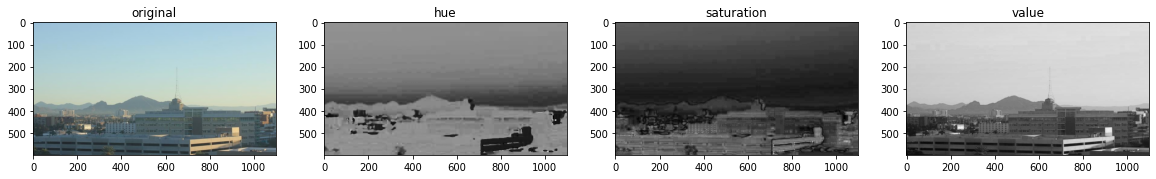

In [13]:
explore(0)

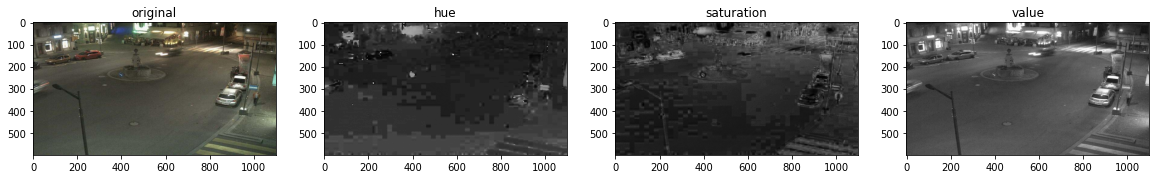

In [9]:
explore(230)

In [14]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt
import helpers 

# setting up data directories

In [16]:
image_dir_training = "day_night_images/training/"
image_dir_test = "day_night_images/test/"

# loading dataset

In [17]:
IMAGE_LIST = helpers.load_dataset(image_dir_training)

# visualizing the dataset 

In [18]:
image_index = 0
selected_image = IMAGE_LIST[image_index][0]
selected_label = IMAGE_LIST[image_index][1]
print("SHAPE:",selected_image.shape,"\nLABEL:", selected_label)

SHAPE: (458, 800, 3) 
LABEL: day


# preprocessing the data

In [19]:
def standerdize_output(image):
    return cv2.resize(image,(1100,600))

In [20]:
def encode(label):
    if label=='night':
        return 0
    return 1

In [23]:
def standerdize(image_list):
    output = [] 
    for i in image_list:
        image, label = i[0], i[1]
        output.append((standerdize_output(image), encode(label)))
    return output

In [24]:
STANDERDIZED_LIST = standerdize(IMAGE_LIST)

# visualize the standerdized data

Text(0.5, 1.0, '0')

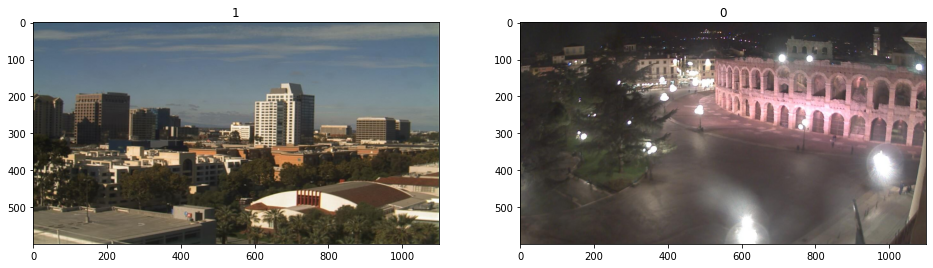

In [25]:
f,(ax1,ax2) = plt.subplots(1,2, figsize=(16,8))
ax1.imshow(STANDERDIZED_LIST[15][0])
ax1.set_title((STANDERDIZED_LIST[15][1]))

ax2.imshow(STANDERDIZED_LIST[200][0])
ax2.set_title((STANDERDIZED_LIST[200][1]))




# Feature Extraction 

In [26]:
def avg_brightness(image):
    #convert RGB to HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    plt.imshow(hsv_image)
    sum_value_channel = np.sum(hsv_image[:,:,2])
    image_area = 1100*600
    return sum_value_channel/image_area

# Classification

In [32]:
def classify(image):
    avg = avg_brightness(image)
    predicted_label = 0
    threshold = 99.0
    if(avg>threshold):
        predicted_label = 1
    return predicted_label 


# testing

In [33]:
import random
TEST_IMAGE_LIST = helpers.load_dataset(image_dir_test)
STANDERDIZED_TEST_LIST = standerdize(TEST_IMAGE_LIST)
random.shuffle(STANDERDIZED_TEST_LIST)

In [34]:
def misclassified_images(test_images):
    misclass = []
    for i in test_images:
        img,true_label = i[0], i[1] #ground truth 
        predicted_label = classify(img) #my classifer
        print(f'true_label: {true_label} predicted_label: {predicted_label}')
        if(predicted_label!=true_label):
            misclass.append((img,predicted_label))
    return(misclass)



# Accuracy

true_label: 0 predicted_label: 0
true_label: 0 predicted_label: 0
true_label: 0 predicted_label: 0
true_label: 1 predicted_label: 1
true_label: 1 predicted_label: 1
true_label: 1 predicted_label: 1
true_label: 1 predicted_label: 1
true_label: 0 predicted_label: 0
true_label: 1 predicted_label: 0
true_label: 0 predicted_label: 0
true_label: 1 predicted_label: 1
true_label: 1 predicted_label: 1
true_label: 0 predicted_label: 0
true_label: 1 predicted_label: 1
true_label: 1 predicted_label: 1
true_label: 0 predicted_label: 0
true_label: 1 predicted_label: 1
true_label: 1 predicted_label: 1
true_label: 1 predicted_label: 1
true_label: 0 predicted_label: 0
true_label: 1 predicted_label: 1
true_label: 0 predicted_label: 0
true_label: 0 predicted_label: 0
true_label: 0 predicted_label: 0
true_label: 1 predicted_label: 1
true_label: 1 predicted_label: 1
true_label: 1 predicted_label: 1
true_label: 0 predicted_label: 1
true_label: 0 predicted_label: 0
true_label: 0 predicted_label: 0
true_label

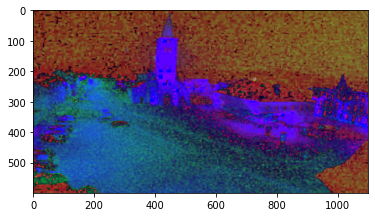

In [35]:
total = len(STANDERDIZED_TEST_LIST)
wrong = len(misclassified_images(STANDERDIZED_TEST_LIST))
correct = total - wrong
print("accuracy = ",correct/total)
print("number of miclassified image = ", wrong)
print("total images",total)

# Exploring misclassified images

true_label: 0 predicted_label: 0
true_label: 0 predicted_label: 0
true_label: 0 predicted_label: 0
true_label: 1 predicted_label: 1
true_label: 1 predicted_label: 1
true_label: 1 predicted_label: 1
true_label: 1 predicted_label: 1
true_label: 0 predicted_label: 0
true_label: 1 predicted_label: 0
true_label: 0 predicted_label: 0
true_label: 1 predicted_label: 1
true_label: 1 predicted_label: 1
true_label: 0 predicted_label: 0
true_label: 1 predicted_label: 1
true_label: 1 predicted_label: 1
true_label: 0 predicted_label: 0
true_label: 1 predicted_label: 1
true_label: 1 predicted_label: 1
true_label: 1 predicted_label: 1
true_label: 0 predicted_label: 0
true_label: 1 predicted_label: 1
true_label: 0 predicted_label: 0
true_label: 0 predicted_label: 0
true_label: 0 predicted_label: 0
true_label: 1 predicted_label: 1
true_label: 1 predicted_label: 1
true_label: 1 predicted_label: 1
true_label: 0 predicted_label: 1
true_label: 0 predicted_label: 0
true_label: 0 predicted_label: 0
true_label

IndexError: list index out of range

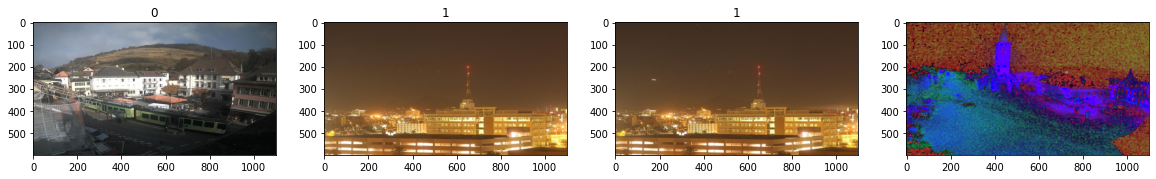

In [36]:
f,(ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(20,10))
MISCLASSIFIED = misclassified_images(STANDERDIZED_TEST_LIST)
ax1.imshow(MISCLASSIFIED[0][0])
ax1.set_title(MISCLASSIFIED[0][1])
ax2.imshow(MISCLASSIFIED[3][0])
ax2.set_title(MISCLASSIFIED[3][1])
ax3.imshow(MISCLASSIFIED[2][0])
ax3.set_title(MISCLASSIFIED[2][1])
ax4.imshow(MISCLASSIFIED[11][0])
ax4.set_title(MISCLASSIFIED[11][1])
print("Predicted Label = Night : 0, Day : 1")